In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

In [25]:
# Parameters
β = 0.96
α = 0.3
grid_min = 1e-5
grid_max = 3
grid_size = 200

grid = np.linspace(grid_min, grid_max, grid_size)

In [22]:
# Functions
def u_prime(c):
    return 1 / c
    
def f(k):
    return k**α
    
def f_prime(k):
    return α * k**(α - 1)

In [26]:
def Euler_Equation(c, grid):
    '''Function that specifies the Euler Equation'''
    
    # Storage space
    c_star = np.zeros(grid.size)
    
    # Interpolation function
    σ_func = lambda x: np.interp(x, c, grid)
    
    for i, y in enumerate(grid):
        objective = lambda c: u_prime(c) - β * u_prime(σ_func(f(y - c))) * f_prime(y - c)
        c_star[i] = brentq(objective, 1e-10, y - 1e-10)
    
    return c_star

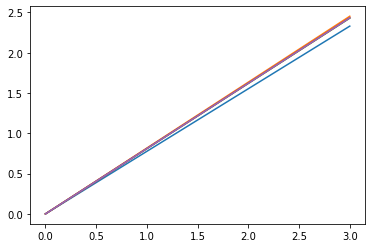

In [27]:
n = 5

σ = grid.copy()

for i in range(n):
    σ = Euler_Equation(σ, grid)
    plt.plot(grid, σ)
    
plt.show()